In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Plot #1: show if there is potential correlation between daily short trips & Stock market index

In [3]:
## read data
org_data = pd.read_csv("Transportation_Network_Providers_-_Trips.csv")

In [5]:
## only consider short trip for now (short trip: miles<5)
short_data = org_data[org_data['Trip Miles']<5]

In [6]:
## Take a 100,000 subsample for analysis speed purpose, be able to use the full data on AWS for the project
short_sample = short_data.sample(n=100000, random_state=1)

In [102]:
## covvert date object to datetime
short_sample['date'] = pd.to_datetime(short_sample['Trip End Timestamp'])

In [81]:
## exact detailed info
short_sample['month'] = pd.DatetimeIndex(short_sample['date']).month
short_sample['day'] = pd.DatetimeIndex(short_sample['date']).day
short_sample['time'] = pd.DatetimeIndex(short_sample['date']).time

In [9]:
## clean the sample data, remove NA and only keep November and December data
short_sample = short_sample[short_sample['Dropoff Centroid Latitude'].notna()]
short_sample = short_sample[short_sample['month']>1]

In [10]:
## Count daily trips for plotting
day_trip = pd.DataFrame(short_sample[['Trip ID','month','day']].groupby(['month','day']).count())
day_trip = day_trip.reset_index()

In [11]:
## Read Nasdaq Composite data, downloaded from Yahoo finance
## https://finance.yahoo.com/quote/%5EIXIC/history?period1=1541044800&period2=1546232400&interval=1d&filter=history&frequency=1d
nad_data = pd.read_csv('nasdaq.csv')

In [12]:
## get date information
nad_data['date'] = pd.to_datetime(nad_data['Date'])
nad_data['month'] = pd.DatetimeIndex(nad_data['date']).month
nad_data['day'] = pd.DatetimeIndex(nad_data['date']).day

In [13]:
## merge two summary data
nad_trip = pd.merge(nad_data, day_trip,how='left',left_on=['month','day'],right_on=['month','day'])

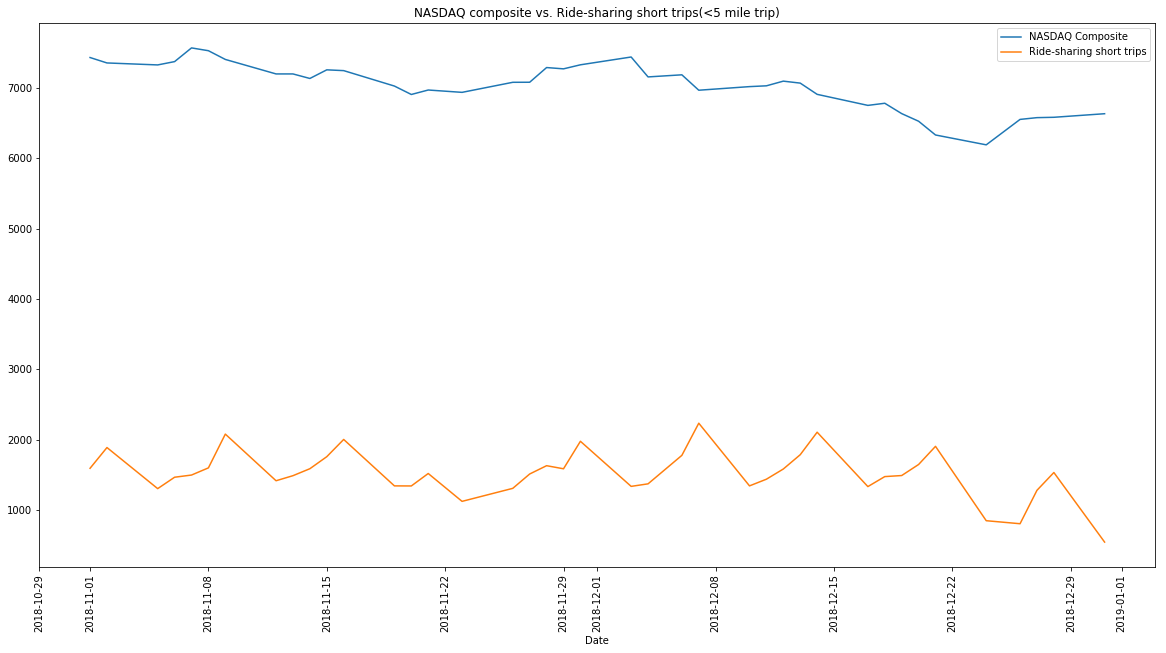

In [67]:
## Plot the trend of daily short trips vs. Nasdaq Composite daily trend
plt.figure(figsize=(20,10))
plt.plot(nad_trip['date'], nad_trip['Adj Close'], label='NASDAQ Composite')
plt.plot(nad_trip['date'], nad_trip['Trip ID'], label='Ride-sharing short trips')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.xlabel('Date')
# plt.ylabel('Y Axis Title Here')
plt.title('NASDAQ composite vs. Ride-sharing short trips(<5 mile trip)')
plt.show()

### Perception: it seems there are correlation between short trips and Nasdaq Index, with a better defined business market index, the correlation would be revealed.

### Plot #2: trip origin and destination: show the dynamics of travel behaviors (origin to destination)

In [52]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [89]:
short_sample['date'].describe()

count                   98165
unique                   5848
top       2018-12-08 19:45:00
freq                       60
first     2018-11-01 00:00:00
last      2018-12-31 23:45:00
Name: date, dtype: object

In [108]:
t_min = "2018-11-01 10:00:00"
t_min = pd.to_datetime(t_min)
t_max = "2018-11-01 14:00:00"
t_max = pd.to_datetime(t_max)
t_max

Timestamp('2018-11-01 14:00:00')

In [109]:
short_sample_noon = short_sample[short_sample['date'].between(t_min,t_max)]

In [110]:
# short_sample[short_sample['Dropoff Community Area']==1]
short_sample_noon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 12290382 to 16350128
Data columns (total 26 columns):
Trip ID                       242 non-null object
Trip Start Timestamp          242 non-null object
Trip End Timestamp            242 non-null object
Trip Seconds                  242 non-null float64
Trip Miles                    242 non-null float64
Pickup Census Tract           167 non-null float64
Dropoff Census Tract          169 non-null float64
Pickup Community Area         235 non-null float64
Dropoff Community Area        242 non-null float64
Fare                          242 non-null float64
Tip                           242 non-null int64
Additional Charges            242 non-null float64
Trip Total                    242 non-null float64
Shared Trip Authorized        242 non-null bool
Trips Pooled                  242 non-null int64
Pickup Centroid Latitude      235 non-null float64
Pickup Centroid Longitude     235 non-null float64
Pickup Centroid Location  

In [54]:
gdf_origin = geopandas.GeoDataFrame(short_sample_1, geometry=[Point(x, y) for x, y in zip(short_sample_1['Pickup Centroid Longitude'], short_sample_1['Pickup Centroid Latitude'])])

In [55]:
gdf_dest = geopandas.GeoDataFrame(short_sample_1, geometry=[Point(x, y) for x, y in zip(short_sample_1['Dropoff Centroid Longitude'], short_sample_1['Dropoff Centroid Latitude'])])

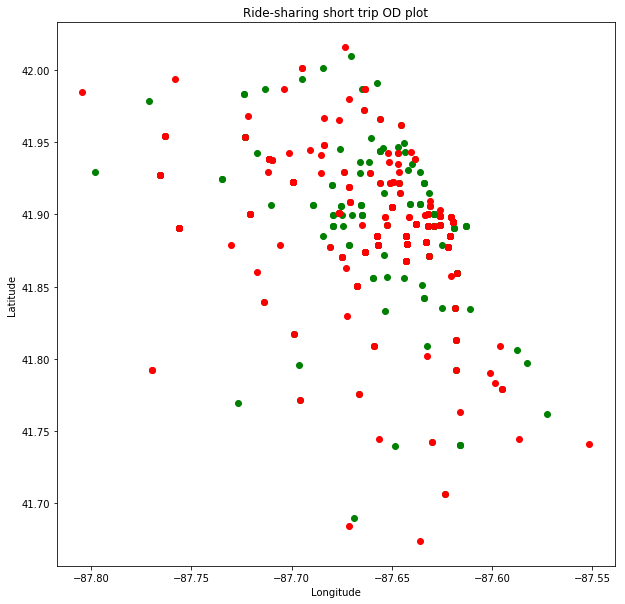

In [116]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# ax = world[world.name == 'United States'].plot(
#     color='white', edgecolor='black',figsize=(20,10))
# We can now plot our GeoDataFrame.

plt.figure(figsize=(10,10))
plt.plot(short_sample_noon['Pickup Centroid Longitude'],short_sample_noon['Pickup Centroid Latitude'], 'o',label='Origin',color="green")
plt.plot(short_sample_noon['Dropoff Centroid Longitude'],short_sample_noon['Dropoff Centroid Latitude'], 'o',label='Destinaton',color="red")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ride-sharing short trip OD plot')
# fig, ax = plt.subplots(figsize = (20,16)) 
# gdf_origin.plot(color='green',label='Origin',ax=ax)
# gdf_dest.plot(color='red',label='Destination',ax=ax)
plt.show()

### The plot shows the ride-sharing trip origins and destination on a selected data 2018-11-01 between 10:00 to 14:00 am. The pick up and drop off locations could be further corronsponding to business vendor locations, and thus reveal the trip dynamics and business vendor locations.